In [13]:
import scipy
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [30]:
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

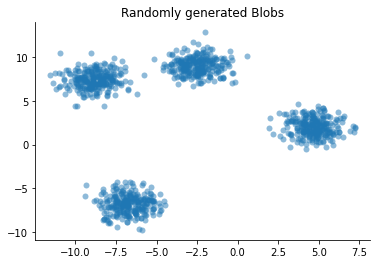

In [7]:
fig, ax = plt.subplots()
sns.despine()
sns.scatterplot(x = X[:,0], y = X[:,1], linewidth = 0, alpha= 0.5)
plt.title("Randomly generated Blobs")
plt.savefig("K-Means.pdf", dpi = 500)

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [9]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [29]:
dm = DBSCAN(
    eps=0.5,
    min_samples = 5
)
db_km = dm.fit_predict(X)

Text(0.5, 1.0, 'K-Means Clustering')

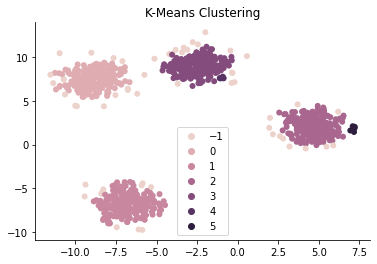

In [27]:
# Draw the Plot
fig, ax = plt.subplots()
sns.despine()
sns.scatterplot(x = X[:,0], y = X[:,1], hue = db_km, linewidth = 0)
plt.title("K-Means Clustering")

Text(0.5, 1.0, 'K-Means Clustering')

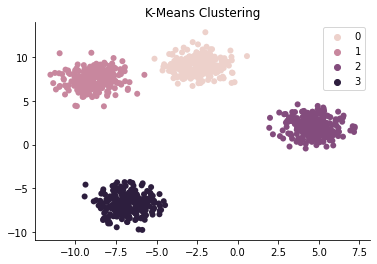

In [28]:
# Draw the Plot
fig, ax = plt.subplots()
sns.despine()
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, linewidth = 0)
plt.title("K-Means Clustering")

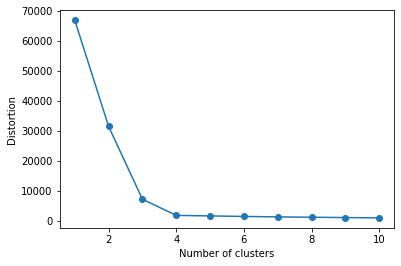

In [12]:
# typicall way of extracting data is the elbow point
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
